## Charmonia Primordial Suppression in pPb Collision

## Load & Preprocess Datafiles

In [1]:
# run this once per notebook
import sys
from pathlib import Path
import numpy as np

project = Path.cwd()                  
sys.path.insert(0, str(project / "code"))

In [2]:
from primordial_module import (
    ReaderConfig, build_ensemble, make_bins_from_width,
    rpa_vs_y_binned, rpa_vs_pt_binned,
    plot_with_bands, subplot_grid_rpa_y_per_b, subplot_grid_rpa_pt_per_b,
    Y_WINDOW_ALL, Y_WINDOW_FORWARD, Y_WINDOW_BACKWARD, Y_WINDOW_CENTRAL
)

In [3]:
# 0) Paths (edit these)
base_prefix     = str(project / "input/primordial/pPb8TeV/output_8pPb_Tf170_Pert")   
centrality_root = str(project / "input/glauber_data/8TeV")         

# 1) Load τ1/τ2 runs as an ensemble
ens, runs = build_ensemble(base_prefix, centrality_root, tags=("tau1","tau2"), cfg=ReaderConfig(debug=True))

[INFO] Loaded 1,310,720 events from '/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/input/primordial/pPb8TeV/output_8pPb_Tf170_Pert_tau1/datafile.gz'. b∈[1.53,7.44], pT∈[0.003391,39.52], y∈[-5.20,6.33]
[INFO] Loaded 1,310,720 events from '/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/input/primordial/pPb8TeV/output_8pPb_Tf170_Pert_tau2/datafile.gz'. b∈[1.53,7.44], pT∈[0.003391,39.52], y∈[-5.20,6.33]


In [4]:
base_prefixNPWLC     = str(project / "input/primordial/pPb8TeV/output_8pPb_Tf170_NPWLC")      

# 1) Load τ1/τ2 runs as an ensemble
ensNPWLC, runsNPWLC = build_ensemble(base_prefixNPWLC, centrality_root, tags=("tau1","tau2"), cfg=ReaderConfig(debug=True))

[INFO] Loaded 1,315,488 events from '/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/input/primordial/pPb8TeV/output_8pPb_Tf170_NPWLC_tau1/datafile.gz'. b∈[1.53,7.44], pT∈[0.003391,39.52], y∈[-5.20,6.33]
[INFO] Loaded 1,310,720 events from '/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/input/primordial/pPb8TeV/output_8pPb_Tf170_NPWLC_tau2/datafile.gz'. b∈[1.53,7.44], pT∈[0.003391,39.52], y∈[-5.20,6.33]


In [5]:
# Quick inspection
for tag, ana in runs.items():
    df = ana.df
    print(f"[{tag}] #rows={len(df):,}, b=[{df.b.min():.2f},{df.b.max():.2f}], "
          f"pT=[{df.pt.min():.3g},{df.pt.max():.3g}], y=[{df.y.min():.2f},{df.y.max():.2f}]")
    print(" unique b values:", np.unique(df["b"].values)[:8])

[tau1] #rows=1,310,720, b=[1.53,7.44], pT=[0.00339,39.5], y=[-5.20,6.33]
 unique b values: [1.53136 2.79998 3.62584 4.29371 4.87028 5.38538 5.85623 6.29829]
[tau2] #rows=1,310,720, b=[1.53,7.44], pT=[0.00339,39.5], y=[-5.20,6.33]
 unique b values: [1.53136 2.79998 3.62584 4.29371 4.87028 5.38538 5.85623 6.29829]


## $R_{pA}$ vs Centrality

[rpa_vs_b] b=1.531 (1)  n=131,072
[rpa_vs_b] b=2.800 (2)  n=131,072
[rpa_vs_b] b=3.626 (3)  n=131,072
[rpa_vs_b] b=4.294 (4)  n=131,072
[rpa_vs_b] b=4.870 (5)  n=131,072
[rpa_vs_b] b=5.385 (6)  n=131,072
[rpa_vs_b] b=5.856 (7)  n=131,072
[rpa_vs_b] b=6.298 (8)  n=131,072
[rpa_vs_b] b=6.746 (9)  n=131,072
[rpa_vs_b] b=7.438 (10)  n=131,072
[rpa_vs_b] b=1.531 (1)  n=131,072
[rpa_vs_b] b=2.800 (2)  n=131,072
[rpa_vs_b] b=3.626 (3)  n=131,072
[rpa_vs_b] b=4.294 (4)  n=131,072
[rpa_vs_b] b=4.870 (5)  n=131,072
[rpa_vs_b] b=5.385 (6)  n=131,072
[rpa_vs_b] b=5.856 (7)  n=131,072
[rpa_vs_b] b=6.298 (8)  n=131,072
[rpa_vs_b] b=6.746 (9)  n=131,072
[rpa_vs_b] b=7.438 (10)  n=131,072
[rpa_vs_b] b=1.531 (1)  n=131,072
[rpa_vs_b] b=2.800 (2)  n=135,840
[rpa_vs_b] b=3.626 (3)  n=131,072
[rpa_vs_b] b=4.294 (4)  n=131,072
[rpa_vs_b] b=4.870 (5)  n=131,072
[rpa_vs_b] b=5.385 (6)  n=131,072
[rpa_vs_b] b=5.856 (7)  n=131,072
[rpa_vs_b] b=6.298 (8)  n=131,072
[rpa_vs_b] b=6.746 (9)  n=131,072
[rpa_vs_b] b

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '$NPWLC$'}, xlabel='$b\\ [\\mathrm{fm}]$', ylabel='$R_{pA}$'>)

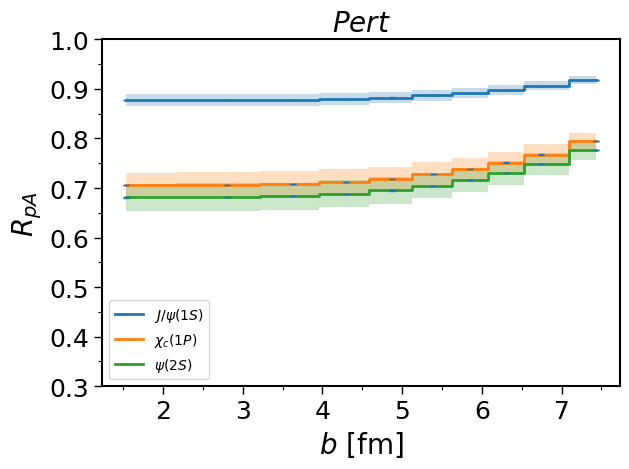

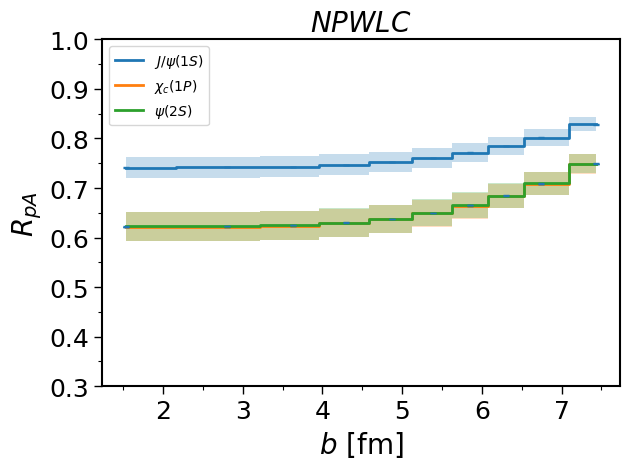

In [6]:
# 2) RpA vs b  (central=avg(τ1,τ2); band=[τ1,τ2] with swap-guard)
rb_center, rb_band = ens.central_and_band_vs_b(with_feeddown=True, use_nbin=True)
rb_centerNPWLC, rb_bandNPWLC = ensNPWLC.central_and_band_vs_b(with_feeddown=True, use_nbin=True)
plot_with_bands(
    rb_center, rb_band, xcol="b",
    states=["jpsi_1S" , "chicJ_1P", "psi_2S"], # "jpsi_1S" , "chicJ_1P", "psi_2S"
    title=r"$Pert$", xtick_step=1.0, ytick_step=0.1,
    ylim=(0.3, 1.0)
)
plot_with_bands(
    rb_centerNPWLC, rb_bandNPWLC, xcol="b",
    states=["jpsi_1S" , "chicJ_1P", "psi_2S"], # "jpsi_1S" , "chicJ_1P", "psi_2S"
    title=r"$NPWLC$", xtick_step=1.0, ytick_step=0.1,
    ylim=(0.3, 1.0)
)

[rpa_vs_b] b=1.531 (1)  n=131,072
[rpa_vs_b] b=2.800 (2)  n=131,072
[rpa_vs_b] b=3.626 (3)  n=131,072
[rpa_vs_b] b=4.294 (4)  n=131,072
[rpa_vs_b] b=4.870 (5)  n=131,072
[rpa_vs_b] b=5.385 (6)  n=131,072
[rpa_vs_b] b=5.856 (7)  n=131,072
[rpa_vs_b] b=6.298 (8)  n=131,072
[rpa_vs_b] b=6.746 (9)  n=131,072
[rpa_vs_b] b=7.438 (10)  n=131,072
[rpa_vs_b] b=1.531 (1)  n=131,072
[rpa_vs_b] b=2.800 (2)  n=131,072
[rpa_vs_b] b=3.626 (3)  n=131,072
[rpa_vs_b] b=4.294 (4)  n=131,072
[rpa_vs_b] b=4.870 (5)  n=131,072
[rpa_vs_b] b=5.385 (6)  n=131,072
[rpa_vs_b] b=5.856 (7)  n=131,072
[rpa_vs_b] b=6.298 (8)  n=131,072
[rpa_vs_b] b=6.746 (9)  n=131,072
[rpa_vs_b] b=7.438 (10)  n=131,072


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '$R_{pA}$ vs $N_{\\mathrm{part}}$'}, xlabel='$N_{\\mathrm{part}}$', ylabel='$R_{pA}$'>)

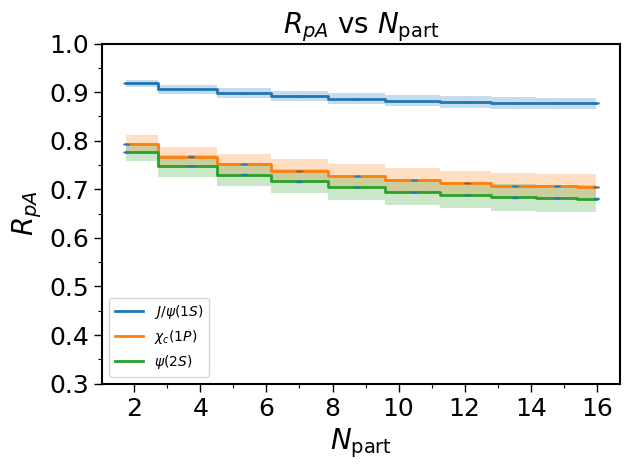

In [7]:
# 3) RpA vs Npart
rn_center, rn_band = ens.central_and_band_vs_npart(with_feeddown=True, use_nbin=True)
plot_with_bands(rn_center, rn_band, xcol="Npart", states=["jpsi_1S" , "chicJ_1P", "psi_2S"],
                title=r"$R_{pA}$ vs $N_{\mathrm{part}}$",
                xtick_step=2, ytick_step=0.1, ylim=(0.3, 1.0))

## $R_{pA}$ vs Rapidity

[rpa_vs_y] bin 1: y∈[-5.00,-4.50]  n=647
[rpa_vs_y] bin 2: y∈[-4.50,-4.00]  n=5,207
[rpa_vs_y] bin 3: y∈[-4.00,-3.50]  n=17,437
[rpa_vs_y] bin 4: y∈[-3.50,-3.00]  n=35,671
[rpa_vs_y] bin 5: y∈[-3.00,-2.50]  n=54,986
[rpa_vs_y] bin 6: y∈[-2.50,-2.00]  n=71,685
[rpa_vs_y] bin 7: y∈[-2.00,-1.50]  n=82,995
[rpa_vs_y] bin 8: y∈[-1.50,-1.00]  n=91,274
[rpa_vs_y] bin 9: y∈[-1.00,-0.50]  n=96,520
[rpa_vs_y] bin 10: y∈[-0.50,0.00]  n=99,060
[rpa_vs_y] bin 11: y∈[0.00,0.50]  n=100,759
[rpa_vs_y] bin 12: y∈[0.50,1.00]  n=100,231
[rpa_vs_y] bin 13: y∈[1.00,1.50]  n=99,326
[rpa_vs_y] bin 14: y∈[1.50,2.00]  n=96,494
[rpa_vs_y] bin 15: y∈[2.00,2.50]  n=90,733
[rpa_vs_y] bin 16: y∈[2.50,3.00]  n=83,037
[rpa_vs_y] bin 17: y∈[3.00,3.50]  n=71,095
[rpa_vs_y] bin 18: y∈[3.50,4.00]  n=54,736
[rpa_vs_y] bin 19: y∈[4.00,4.50]  n=35,525
[rpa_vs_y] bin 20: y∈[4.50,5.00]  n=17,191
[rpa_vs_y] bin 1: y∈[-5.00,-4.50]  n=647
[rpa_vs_y] bin 2: y∈[-4.50,-4.00]  n=5,207
[rpa_vs_y] bin 3: y∈[-4.00,-3.50]  n=17,437
[rpa

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '$R_{pA}(y)$, $0<p_T<20$ GeV'}, xlabel='$y$', ylabel='$R_{pA}$'>)

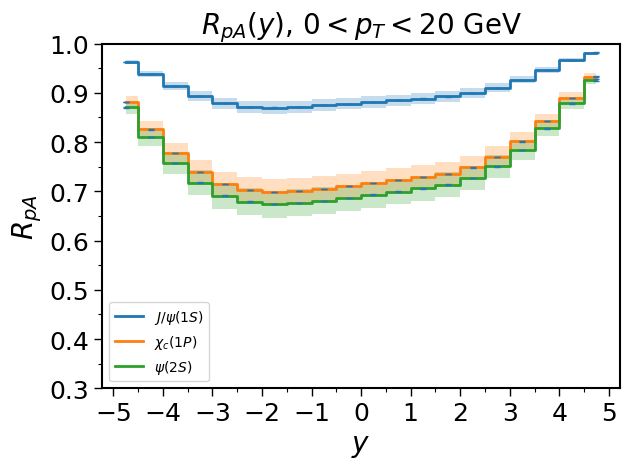

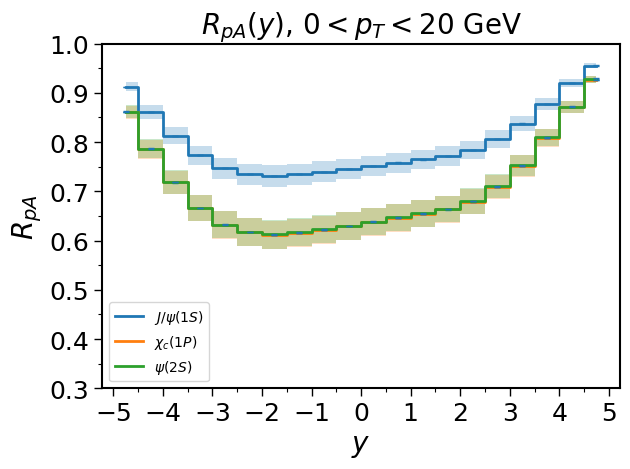

In [8]:
# 4) RpA vs y (integrated over a pt-window)
y_bins = make_bins_from_width(-5, 5, 0.5)
ry_center, ry_band = ens.central_and_band_vs_y(
    pt_window=(0.0, 20.0), y_bins=y_bins,
    with_feeddown=True, use_nbin=True,
    flip_y=True  # common for pPb to plot p-going positive
)
ry_centerNPWLC, ry_bandNPWLC = ensNPWLC.central_and_band_vs_y(
    pt_window=(0.0, 20.0), y_bins=y_bins,
    with_feeddown=True, use_nbin=True,
    flip_y=True  # common for pPb to plot p-going positive
)
plot_with_bands(
    ry_center, ry_band, xcol="y",
    states=["jpsi_1S", "chicJ_1P", "psi_2S"],
    title=r"$R_{pA}(y)$, $0<p_T<20$ GeV", xtick_step=1.0, ytick_step=0.1,
    ylim=(0.3, 1.0)
)
plot_with_bands(
    ry_centerNPWLC, ry_bandNPWLC, xcol="y",
    states=["jpsi_1S", "chicJ_1P", "psi_2S"],
    title=r"$R_{pA}(y)$, $0<p_T<20$ GeV", xtick_step=1.0, ytick_step=0.1,
    ylim=(0.3, 1.0)
)

[rpa_vs_y_per_b] b=1.531 (1)
[rpa_vs_y_per_b] b=2.800 (2)
[rpa_vs_y_per_b] b=3.626 (3)
[rpa_vs_y_per_b] b=4.294 (4)
[rpa_vs_y_per_b] b=4.870 (5)
[rpa_vs_y_per_b] b=5.385 (6)
[rpa_vs_y_per_b] b=5.856 (7)
[rpa_vs_y_per_b] b=6.298 (8)
[rpa_vs_y_per_b] b=6.746 (9)
[rpa_vs_y_per_b] b=7.438 (10)
[rpa_vs_y_per_b] b=1.531 (1)
[rpa_vs_y_per_b] b=2.800 (2)
[rpa_vs_y_per_b] b=3.626 (3)
[rpa_vs_y_per_b] b=4.294 (4)
[rpa_vs_y_per_b] b=4.870 (5)
[rpa_vs_y_per_b] b=5.385 (6)
[rpa_vs_y_per_b] b=5.856 (7)
[rpa_vs_y_per_b] b=6.298 (8)
[rpa_vs_y_per_b] b=6.746 (9)
[rpa_vs_y_per_b] b=7.438 (10)


(<Figure size 2300x760 with 10 Axes>,
 array([[<Axes: title={'center': 'Pert, $b=$ 1.53 fm'}, ylabel='$R_{pA}$'>,
         <Axes: title={'center': 'Pert, $b=$ 2.80 fm'}>,
         <Axes: title={'center': 'Pert, $b=$ 3.63 fm'}>,
         <Axes: title={'center': 'Pert, $b=$ 4.29 fm'}>,
         <Axes: title={'center': 'Pert, $b=$ 4.87 fm'}>],
        [<Axes: title={'center': 'Pert, $b=$ 5.39 fm'}, xlabel='$y$', ylabel='$R_{pA}$'>,
         <Axes: title={'center': 'Pert, $b=$ 5.86 fm'}, xlabel='$y$'>,
         <Axes: title={'center': 'Pert, $b=$ 6.30 fm'}, xlabel='$y$'>,
         <Axes: title={'center': 'Pert, $b=$ 6.75 fm'}, xlabel='$y$'>,
         <Axes: title={'center': 'Pert, $b=$ 7.44 fm'}, xlabel='$y$'>]],
       dtype=object))

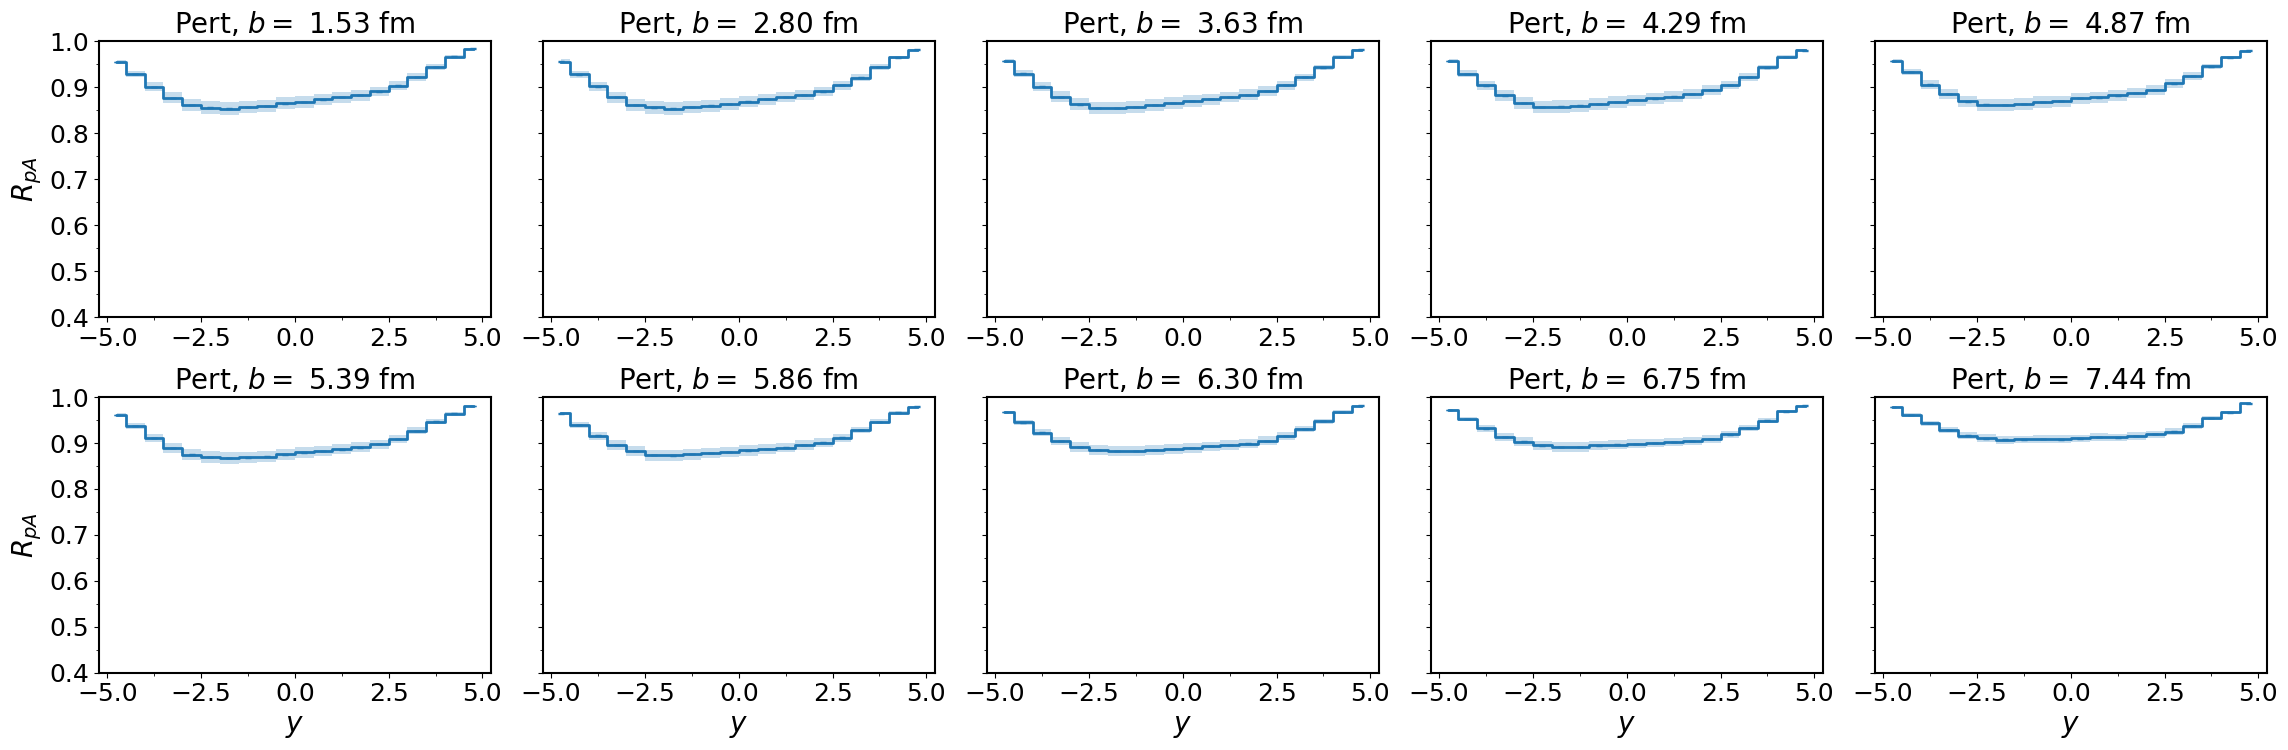

In [9]:
# 5) RpA vs y, one panel per centrality (b) — e.g. for J/psi
ryb_center, ryb_band = ens.central_and_band_vs_y_per_b(
    pt_window=(0.0, 20.0), y_bins=y_bins,
    with_feeddown=True, use_nbin=True,
    flip_y=True
)
subplot_grid_rpa_y_per_b(
    ryb_center, ryb_band,
    state="jpsi_1S", ncols=5, xtick_step=2.5, ytick_step=0.1,
    drop_b=[0.0],          # drop min-bias if present at b=0
    ylim=(0.4, 1.0),
    title_prefix=r"Pert, $b=$ "
)

[rpa_vs_y_per_b] b=1.531 (1)
[rpa_vs_y_per_b] b=2.800 (2)
[rpa_vs_y_per_b] b=3.626 (3)
[rpa_vs_y_per_b] b=4.294 (4)
[rpa_vs_y_per_b] b=4.870 (5)
[rpa_vs_y_per_b] b=5.385 (6)
[rpa_vs_y_per_b] b=5.856 (7)
[rpa_vs_y_per_b] b=6.298 (8)
[rpa_vs_y_per_b] b=6.746 (9)
[rpa_vs_y_per_b] b=7.438 (10)
[rpa_vs_y_per_b] b=1.531 (1)
[rpa_vs_y_per_b] b=2.800 (2)
[rpa_vs_y_per_b] b=3.626 (3)
[rpa_vs_y_per_b] b=4.294 (4)
[rpa_vs_y_per_b] b=4.870 (5)
[rpa_vs_y_per_b] b=5.385 (6)
[rpa_vs_y_per_b] b=5.856 (7)
[rpa_vs_y_per_b] b=6.298 (8)
[rpa_vs_y_per_b] b=6.746 (9)
[rpa_vs_y_per_b] b=7.438 (10)


(<Figure size 2300x760 with 10 Axes>,
 array([[<Axes: title={'center': 'NPWLC, $b=$ 1.53 fm'}, ylabel='$R_{pA}$'>,
         <Axes: title={'center': 'NPWLC, $b=$ 2.80 fm'}>,
         <Axes: title={'center': 'NPWLC, $b=$ 3.63 fm'}>,
         <Axes: title={'center': 'NPWLC, $b=$ 4.29 fm'}>,
         <Axes: title={'center': 'NPWLC, $b=$ 4.87 fm'}>],
        [<Axes: title={'center': 'NPWLC, $b=$ 5.39 fm'}, xlabel='$y$', ylabel='$R_{pA}$'>,
         <Axes: title={'center': 'NPWLC, $b=$ 5.86 fm'}, xlabel='$y$'>,
         <Axes: title={'center': 'NPWLC, $b=$ 6.30 fm'}, xlabel='$y$'>,
         <Axes: title={'center': 'NPWLC, $b=$ 6.75 fm'}, xlabel='$y$'>,
         <Axes: title={'center': 'NPWLC, $b=$ 7.44 fm'}, xlabel='$y$'>]],
       dtype=object))

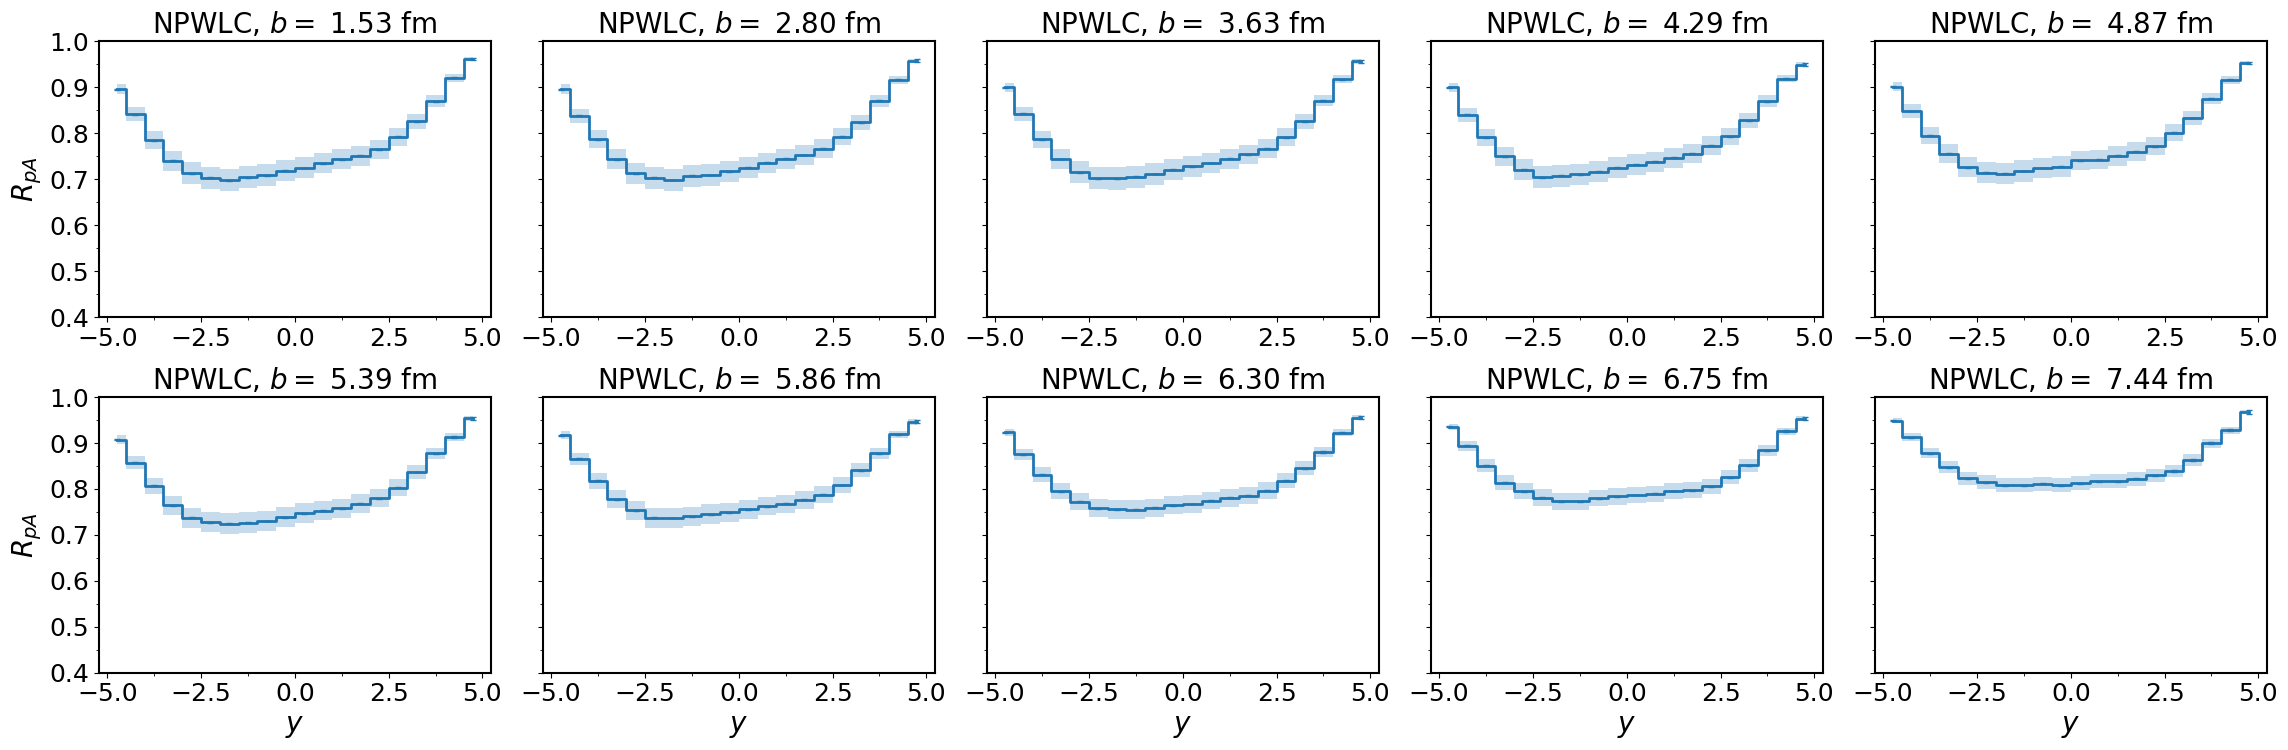

In [10]:
# 5) RpA vs y, one panel per centrality (b) — e.g. for J/psi
ryb_center, ryb_band = ensNPWLC.central_and_band_vs_y_per_b(
    pt_window=(0.0, 20.0), y_bins=y_bins,
    with_feeddown=True, use_nbin=True,
    flip_y=True
)
subplot_grid_rpa_y_per_b(
    ryb_center, ryb_band,
    state="jpsi_1S", ncols=5, xtick_step=2.5, ytick_step=0.1,
    drop_b=[0.0],          # drop min-bias if present at b=0
    ylim=(0.4, 1.0),
    title_prefix=r"NPWLC, $b=$ "
)

## $R_{pA}$ vs Transverse Momentum

In [11]:
# RpA vs pT, in different rapidity windows (examples)
rpT_fwd = rpa_vs_pt_binned(runs["tau1"], y_window=Y_WINDOW_FORWARD, pt_max=20.0, pt_width=2.5,
                           with_feeddown=True, use_nbin=True)
rpT_cen = rpa_vs_pt_binned(runs["tau1"], y_window=Y_WINDOW_CENTRAL, pt_max=20.0, pt_width=2.5,
                           with_feeddown=True, use_nbin=True)
rpT_bwd = rpa_vs_pt_binned(runs["tau1"], y_window=Y_WINDOW_BACKWARD, pt_max=20.0, pt_width=2.5,
                           with_feeddown=True, use_nbin=True)

[rpa_vs_pt] bin 1: pT∈[0.00,2.50]  n=210,244
[rpa_vs_pt] bin 2: pT∈[2.50,5.00]  n=142,242
[rpa_vs_pt] bin 3: pT∈[5.00,7.50]  n=32,515
[rpa_vs_pt] bin 4: pT∈[7.50,10.00]  n=7,743
[rpa_vs_pt] bin 5: pT∈[10.00,12.50]  n=2,164
[rpa_vs_pt] bin 6: pT∈[12.50,15.00]  n=776
[rpa_vs_pt] bin 7: pT∈[15.00,17.50]  n=287
[rpa_vs_pt] bin 8: pT∈[17.50,20.00]  n=123
[rpa_vs_pt] bin 1: pT∈[0.00,2.50]  n=391,865
[rpa_vs_pt] bin 2: pT∈[2.50,5.00]  n=266,208
[rpa_vs_pt] bin 3: pT∈[5.00,7.50]  n=62,572
[rpa_vs_pt] bin 4: pT∈[7.50,10.00]  n=14,851
[rpa_vs_pt] bin 5: pT∈[10.00,12.50]  n=4,437
[rpa_vs_pt] bin 6: pT∈[12.50,15.00]  n=1,488
[rpa_vs_pt] bin 7: pT∈[15.00,17.50]  n=654
[rpa_vs_pt] bin 8: pT∈[17.50,20.00]  n=283
[rpa_vs_pt] bin 1: pT∈[0.00,2.50]  n=62,037
[rpa_vs_pt] bin 2: pT∈[2.50,5.00]  n=40,800
[rpa_vs_pt] bin 3: pT∈[5.00,7.50]  n=8,612
[rpa_vs_pt] bin 4: pT∈[7.50,10.00]  n=1,846
[rpa_vs_pt] bin 5: pT∈[10.00,12.50]  n=450
[rpa_vs_pt] bin 6: pT∈[12.50,15.00]  n=149
[rpa_vs_pt] bin 7: pT∈[15.00,17.

[rpa_vs_pt_per_b] b=1.531 (1)
[rpa_vs_pt_per_b] b=2.800 (2)
[rpa_vs_pt_per_b] b=3.626 (3)
[rpa_vs_pt_per_b] b=4.294 (4)
[rpa_vs_pt_per_b] b=4.870 (5)
[rpa_vs_pt_per_b] b=5.385 (6)
[rpa_vs_pt_per_b] b=5.856 (7)
[rpa_vs_pt_per_b] b=6.298 (8)
[rpa_vs_pt_per_b] b=6.746 (9)
[rpa_vs_pt_per_b] b=7.438 (10)
[rpa_vs_pt_per_b] b=1.531 (1)
[rpa_vs_pt_per_b] b=2.800 (2)
[rpa_vs_pt_per_b] b=3.626 (3)
[rpa_vs_pt_per_b] b=4.294 (4)
[rpa_vs_pt_per_b] b=4.870 (5)
[rpa_vs_pt_per_b] b=5.385 (6)
[rpa_vs_pt_per_b] b=5.856 (7)
[rpa_vs_pt_per_b] b=6.298 (8)
[rpa_vs_pt_per_b] b=6.746 (9)
[rpa_vs_pt_per_b] b=7.438 (10)


(<Figure size 2300x760 with 10 Axes>,
 array([[<Axes: title={'center': '$R_{pA}(p_T)$ at $b=$1.53 fm'}, ylabel='$R_{pA}$'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$2.80 fm'}>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$3.63 fm'}>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$4.29 fm'}>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$4.87 fm'}>],
        [<Axes: title={'center': '$R_{pA}(p_T)$ at $b=$5.39 fm'}, xlabel='$p_T$ [GeV]', ylabel='$R_{pA}$'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$5.86 fm'}, xlabel='$p_T$ [GeV]'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$6.30 fm'}, xlabel='$p_T$ [GeV]'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$6.75 fm'}, xlabel='$p_T$ [GeV]'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$7.44 fm'}, xlabel='$p_T$ [GeV]'>]],
       dtype=object))

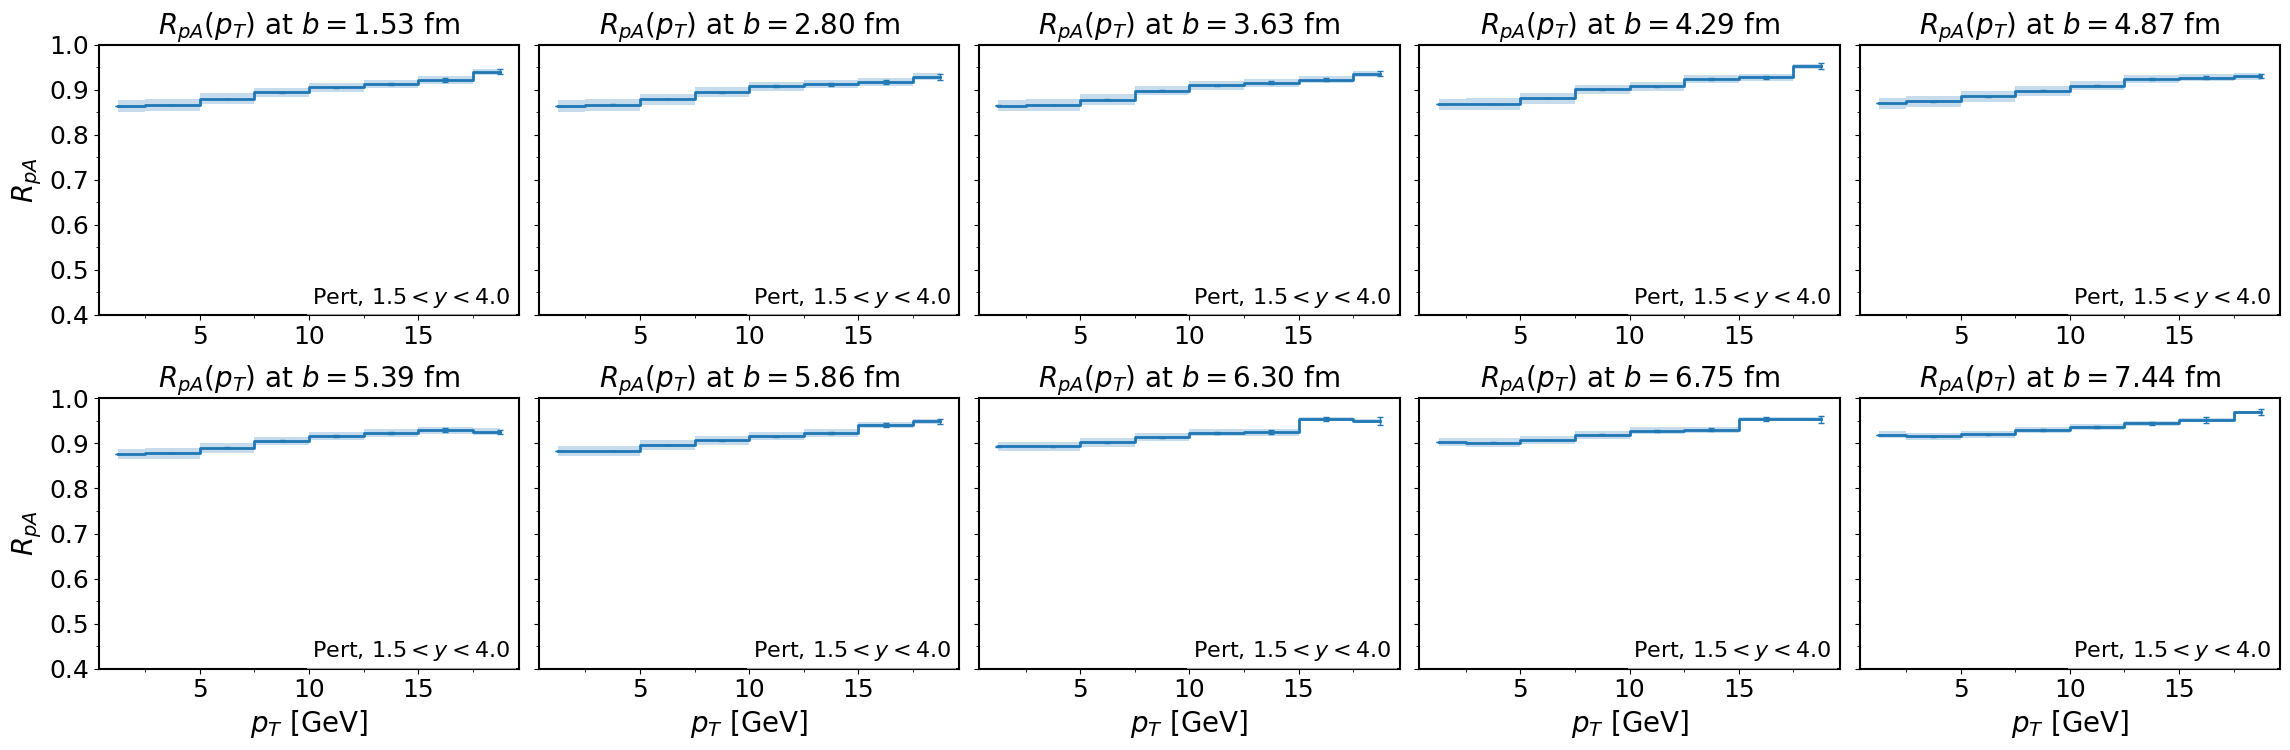

In [12]:
# 6) RpA vs pT, in different forward rapidity windows
pt_bins = make_bins_from_width(0.0, 20.0, 2.5)
note = rf"Pert, ${Y_WINDOW_FORWARD[0]:.1f}<y<{Y_WINDOW_FORWARD[1]:.1f}$"
cp_center, cp_band = ens.central_and_band_vs_pt_per_b(y_window=Y_WINDOW_FORWARD, pt_bins=pt_bins,
                                                      with_feeddown=True, use_nbin=True)
subplot_grid_rpa_pt_per_b(cp_center, cp_band, state="jpsi_1S",
                          ncols=5, xtick_step=5.0, ytick_step=0.1, ylim=(0.4, 1.0), note=note)

[rpa_vs_pt_per_b] b=1.531 (1)
[rpa_vs_pt_per_b] b=2.800 (2)
[rpa_vs_pt_per_b] b=3.626 (3)
[rpa_vs_pt_per_b] b=4.294 (4)
[rpa_vs_pt_per_b] b=4.870 (5)
[rpa_vs_pt_per_b] b=5.385 (6)
[rpa_vs_pt_per_b] b=5.856 (7)
[rpa_vs_pt_per_b] b=6.298 (8)
[rpa_vs_pt_per_b] b=6.746 (9)
[rpa_vs_pt_per_b] b=7.438 (10)
[rpa_vs_pt_per_b] b=1.531 (1)
[rpa_vs_pt_per_b] b=2.800 (2)
[rpa_vs_pt_per_b] b=3.626 (3)
[rpa_vs_pt_per_b] b=4.294 (4)
[rpa_vs_pt_per_b] b=4.870 (5)
[rpa_vs_pt_per_b] b=5.385 (6)
[rpa_vs_pt_per_b] b=5.856 (7)
[rpa_vs_pt_per_b] b=6.298 (8)
[rpa_vs_pt_per_b] b=6.746 (9)
[rpa_vs_pt_per_b] b=7.438 (10)


(<Figure size 2300x760 with 10 Axes>,
 array([[<Axes: title={'center': '$R_{pA}(p_T)$ at $b=$1.53 fm'}, ylabel='$R_{pA}$'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$2.80 fm'}>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$3.63 fm'}>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$4.29 fm'}>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$4.87 fm'}>],
        [<Axes: title={'center': '$R_{pA}(p_T)$ at $b=$5.39 fm'}, xlabel='$p_T$ [GeV]', ylabel='$R_{pA}$'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$5.86 fm'}, xlabel='$p_T$ [GeV]'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$6.30 fm'}, xlabel='$p_T$ [GeV]'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$6.75 fm'}, xlabel='$p_T$ [GeV]'>,
         <Axes: title={'center': '$R_{pA}(p_T)$ at $b=$7.44 fm'}, xlabel='$p_T$ [GeV]'>]],
       dtype=object))

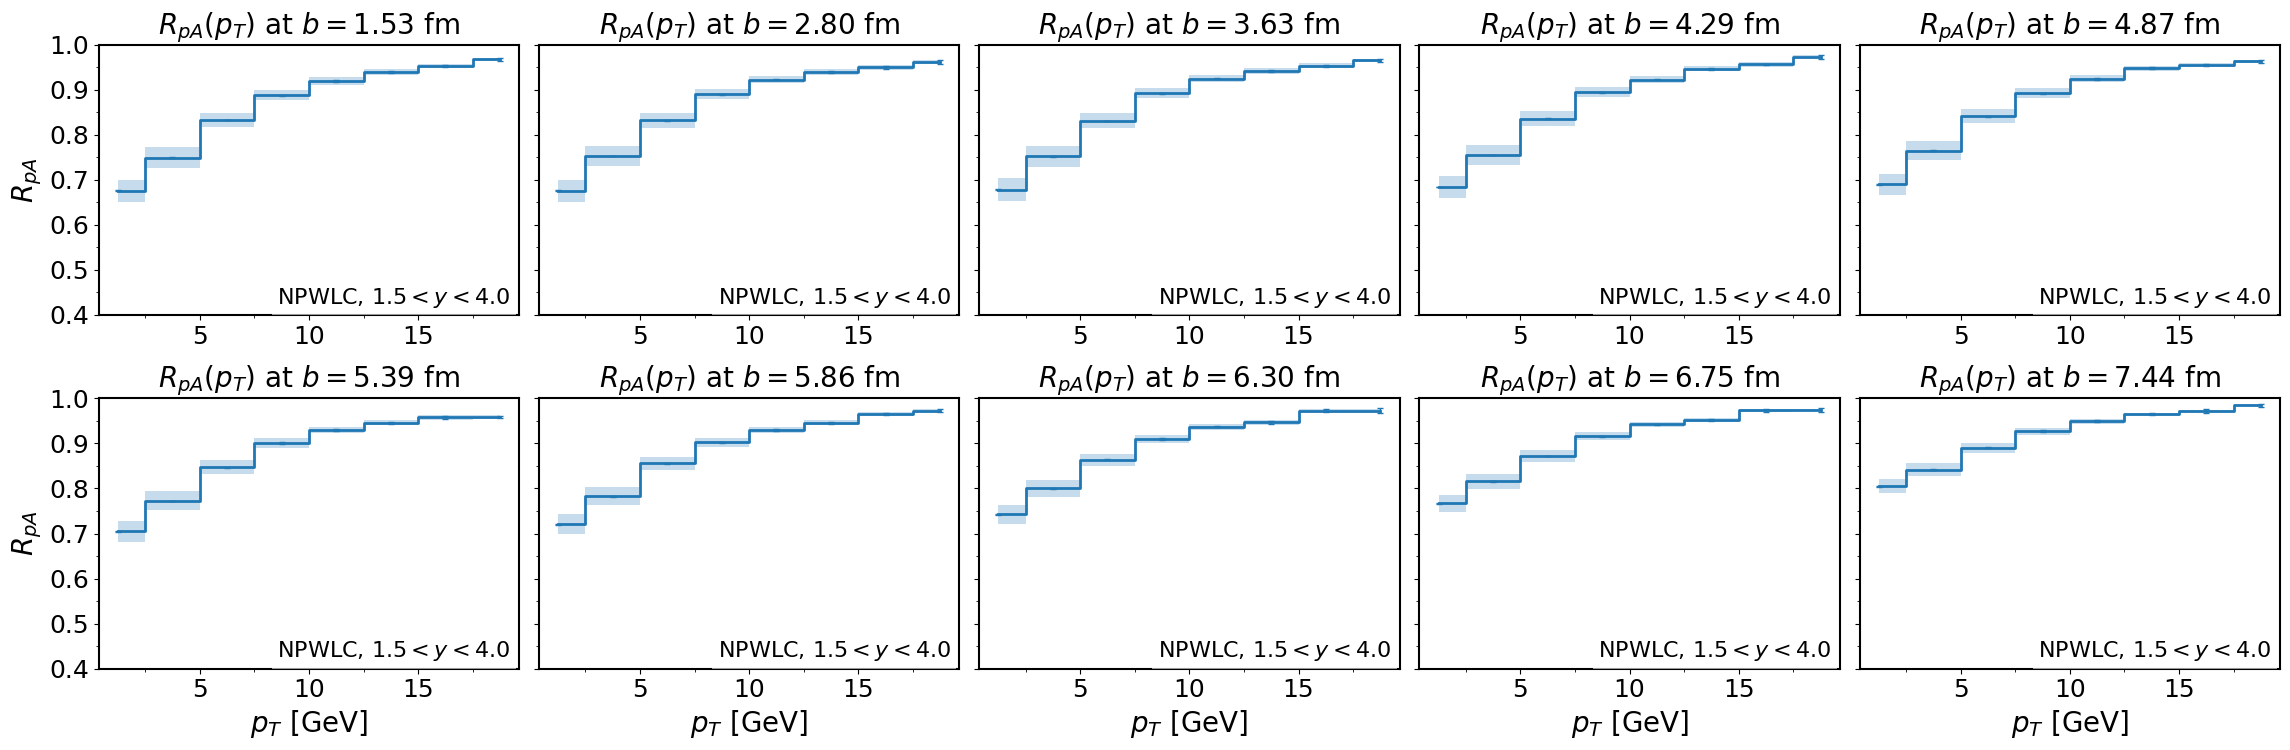

In [13]:
# 6) RpA vs pT, in different forward rapidity windows
pt_bins = make_bins_from_width(0.0, 20.0, 2.5)
note = rf"NPWLC, ${Y_WINDOW_FORWARD[0]:.1f}<y<{Y_WINDOW_FORWARD[1]:.1f}$"
cp_center, cp_band = ensNPWLC.central_and_band_vs_pt_per_b(y_window=Y_WINDOW_FORWARD, pt_bins=pt_bins,
                                                      with_feeddown=True, use_nbin=True)
subplot_grid_rpa_pt_per_b(cp_center, cp_band, state="jpsi_1S",
                          ncols=5, xtick_step=5.0, ytick_step=0.1, ylim=(0.4, 1.0), note=note)